
#**Libraries**

In [19]:
# Basic libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Pre-processing
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier

# Performace metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, classification_report

#**Load data**

In [2]:
dataset = load_breast_cancer()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print('Target variables  : ', dataset['target_names'])

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  ['malignant' 'benign']
Unique values of the target variable [0 1]
Counts of the target variable : [212 357]


In [5]:
X = dataset['data']
y = dataset['target']

X.shape, y.shape

((569, 30), (569,))

In [33]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)


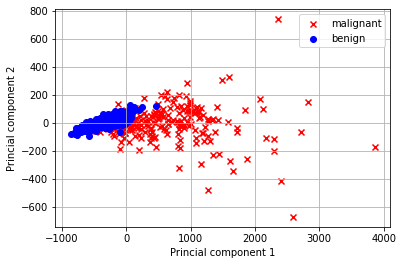

In [35]:
colors = ['r', 'b']
markers = ['x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_PCA[y==l, 0], X_PCA[y==l, 1], c=c, label=dataset['target_names'][l], marker=m)

plt.xlabel('Princial component 1')
plt.ylabel('Princial component 2')
plt.legend()
plt.grid()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

#**SGDClassifier**

In [7]:
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
y_pred = sdg_clf.predict(X_test)

y_pred.shape

(171,)

#**Performace metris**

**Confusion matriz**

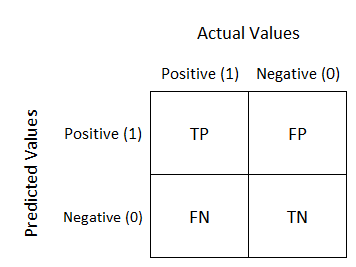

In [9]:
conf_mx = confusion_matrix(y_test, y_pred)

print(conf_mx)

[[ 54   9]
 [  0 108]]


**Presicion and sensibility**


$$precision = \frac{TP}{TP+FP}$$

$$Sensibility = \frac{TP}{TP+FN}$$

In [10]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9230769230769231
1.0


$$F_1 = \frac{TP}{TP+ \frac{FN+FP}{2}}$$

In [11]:
print(f1_score(y_test, y_pred))

0.9600000000000001


In [12]:
print(classification_report(y_test, y_pred, target_names=dataset['target_names']))

              precision    recall  f1-score   support

   malignant       1.00      0.86      0.92        63
      benign       0.92      1.00      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



**Curve ROC**

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [14]:
def plot_roc(fpr, trp, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.grid()
  plt.xlim(0,1)
  plt.ylim(0,1)
  

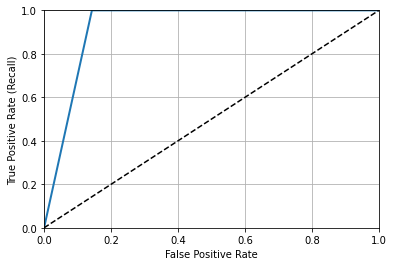

In [15]:
plot_roc(fpr, tpr, 'SGDClassifier')